# (Ford GoBike System Data in Jan 2018)
## by (Abdulkhaliq G. Baban)

## Investigation Overview

> In this investigation, we want to have a look on user type usage of usage GoBike system based on time (weekday, date, hour) & gender.

## Dataset Overview

> This document is exploring & visualizing the trips of Ford GoBike system data for public containing around 85,000 rides in  Jan 2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# read CSV file we downloaded
df_clean = pd.read_csv('clean_file.csv')
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,start_time_day,start_time_weekday,start_time_month_name,start_time_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986.0,Male,No,22,31,Wed,January,1
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,1996.0,Male,No,14,31,Wed,January,1
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,1991.0,Male,No,19,31,Wed,January,1
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,3571,Subscriber,1988.0,Male,No,23,31,Wed,January,1
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,1403,Subscriber,1980.0,Male,No,23,31,Wed,January,1
5,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,...,3675,Subscriber,1987.0,Male,Yes,23,31,Wed,January,1
6,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,...,1453,Subscriber,1994.0,Female,Yes,23,31,Wed,January,1
7,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89,Division St at Potrero Ave,37.769218,-122.407646,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,2928,Subscriber,1993.0,Male,No,23,31,Wed,January,1
8,601,2018-01-31 23:29:46.832,2018-01-31 23:39:48.000,223,16th St Mission BART Station 2,37.764765,-122.420091,86,Market St at Dolores St,37.769305,...,3016,Subscriber,1957.0,Male,No,23,31,Wed,January,1
9,887,2018-01-31 23:24:16.357,2018-01-31 23:39:04.123,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,...,55,Subscriber,1976.0,Female,Yes,23,31,Wed,January,1


## (Ford GoBike system usage by Weekday)

> mostly poeple using ford GoBike system on Wednesday & Tuesday. On other hand, On Sunday is lowest number of trips because of weekend. 

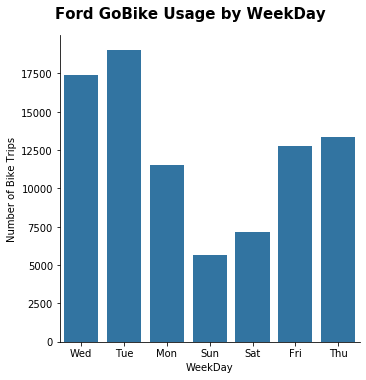

In [3]:
# Ford GoBike system usage by weekday
no_color = sb.color_palette()[0]
month_graph = sb.catplot(data = df_clean, x = 'start_time_weekday', kind = 'count', color = no_color);
month_graph.set_axis_labels('WeekDay', 'Number of Bike Trips'),
month_graph.fig.suptitle('Ford GoBike Usage by WeekDay', y = 1.05, fontsize = 15, fontweight = 'semibold');

## (Ford GoBike system usage by Hour)

> the first Peak time in the morning from 07:00 to 09:00 begining of school classes & working time of companies. the second peak time in the afternoon from 16:00 to 18:00 ending of school classes & working time of companies. 

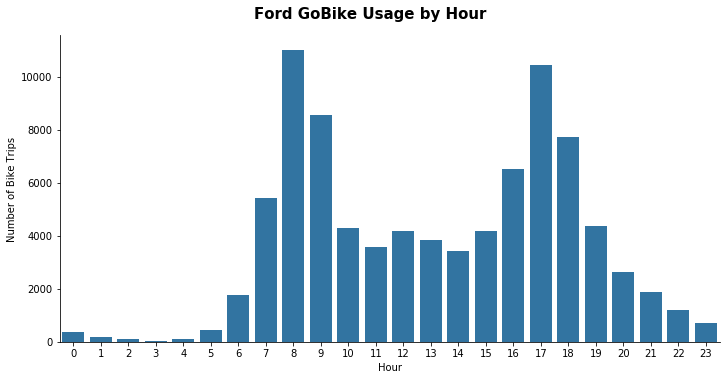

In [4]:
# Ford GoBike system usage by Hour 
hour_graph = sb.catplot(data = df_clean, x = 'start_time_hour', kind = 'count', color = no_color, aspect = 2);
hour_graph.set_axis_labels('Hour', 'Number of Bike Trips'),
hour_graph.fig.suptitle('Ford GoBike Usage by Hour', y = 1.05, fontsize = 15, fontweight = 'semibold');

## (Ford GoBike system usage by Hour per user type)

> Customer users using Bike system similarly from 08:00 to 18:00 but Subscriber users using Bike system mostly on begining & ending of the day.

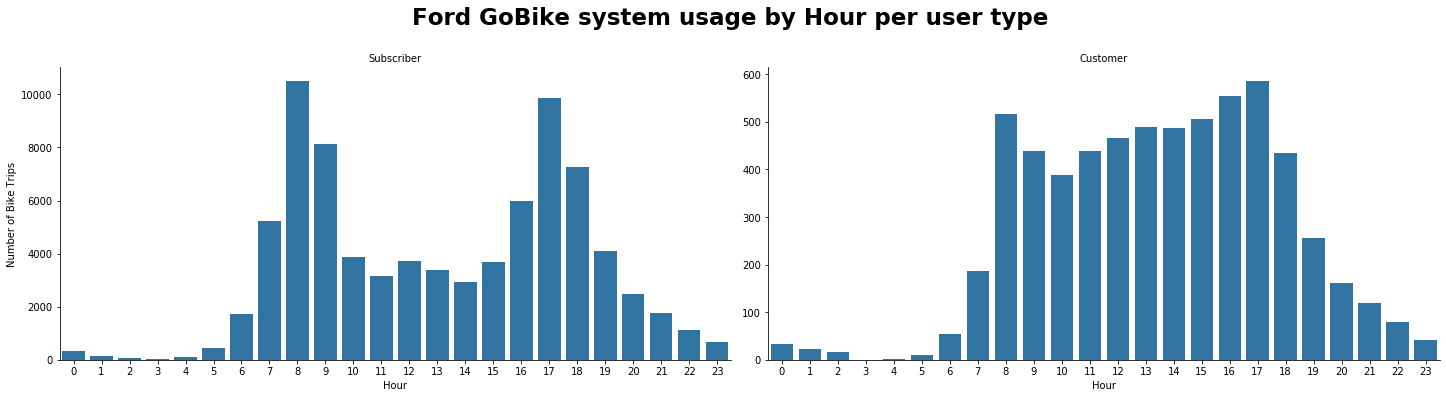

In [5]:
# Ford GoBike system usage by Hour per user type
hour_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_hour', col = "user_type", kind ='count', sharey = False,
            color = no_color, aspect = 2)
hour_user_ghraph.set_axis_labels("Hour", "Number of Bike Trips")
hour_user_ghraph.set_titles("{col_name}")
hour_user_ghraph.fig.suptitle('Ford GoBike system usage by Hour per user type', y=1.1, fontsize=23, fontweight='semibold');

## (Ford GoBike system usage by weekday per user type & gender)

> The number customer Female users is more than subscriber Female users during weekdays.

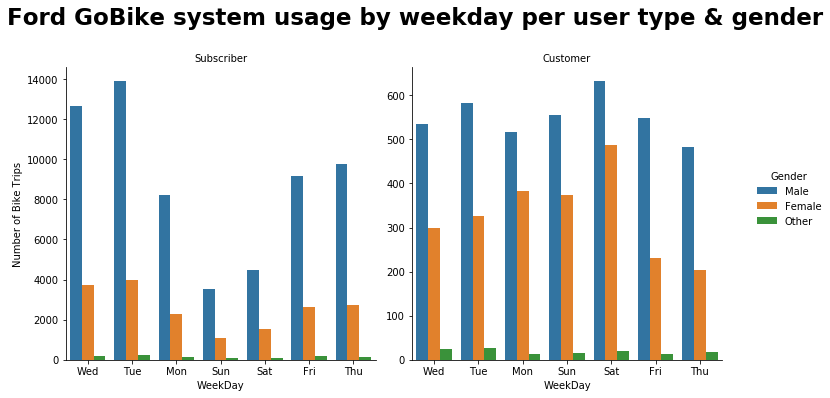

In [6]:
# Ford GoBike system usage by weekday per user type & gender
day_gender_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_weekday', col = "user_type", hue='member_gender', kind ='count', sharey = False)
day_gender_user_ghraph.set_axis_labels("WeekDay", "Number of Bike Trips")
day_gender_user_ghraph.set_titles("{col_name}")
day_gender_user_ghraph.fig.suptitle('Ford GoBike system usage by weekday per user type & gender', y=1.1, fontsize=23, fontweight='semibold')
day_gender_user_ghraph._legend.set_title('Gender');